In [4]:
import scipy as sp
import scipy.interpolate
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import logging
import athplot
import numpy as np
import os
import importlib
os.chdir("/home/astrosun/jtlaune/athena/")
from mpl_styles import analytic
%matplotlib widget
import yt
yt.set_log_level("error")
importlib.reload(athplot)
logging.getLogger('matplotlib.font_manager').disabled = True

# Type II

## Mesh

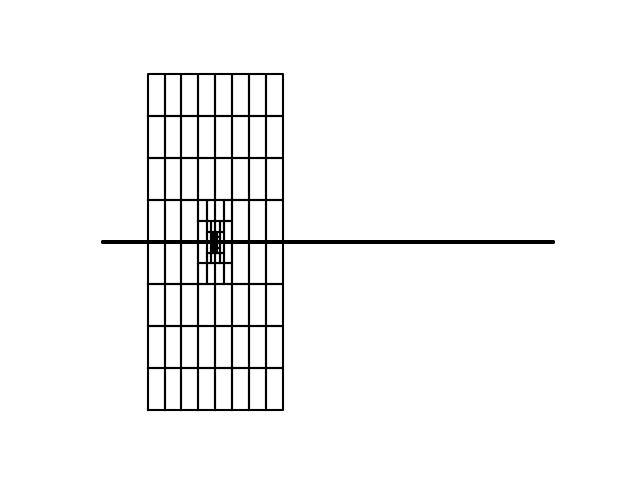

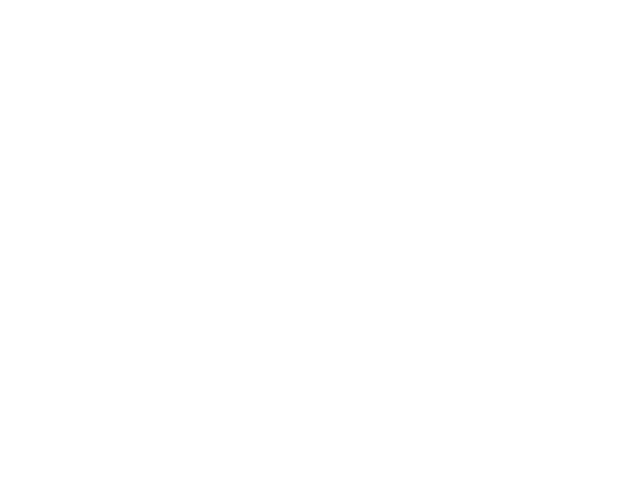

In [3]:
%run -i vis/python/plot_mesh.py -i work/smr5_noAcc/mesh_structure.dat -o show

## 2D plots

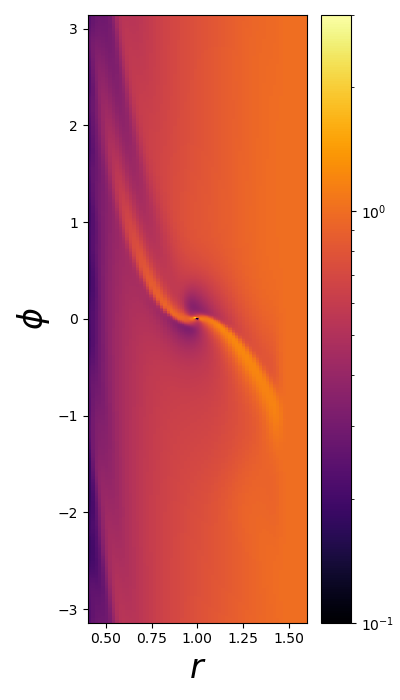

In [32]:
importlib.reload(athplot)
ds = athplot.rawDataRestricted("/home/astrosun/jtlaune/athena/work/type2-linext/accrete/ppd_cyl.out1.00200.athdf")
fig, ax = plt.subplots(figsize=(4, 7))
for lev in range(4):
    cccs, lds = ds.get_level(lev) # meaning: cell center coordinates, level data set
    meshr, meshphi = np.meshgrid(cccs[0], cccs[1])
    im = ax.pcolormesh(meshr, meshphi, lds['dens'], shading='nearest', cmap="inferno", norm=colors.LogNorm(vmin=0.1, vmax=3))
cb = plt.colorbar(im)
ax.set_ylabel(r"$\phi$",fontsize=24)
ax.set_xlabel(r"$r$",fontsize=24)
fig.tight_layout()

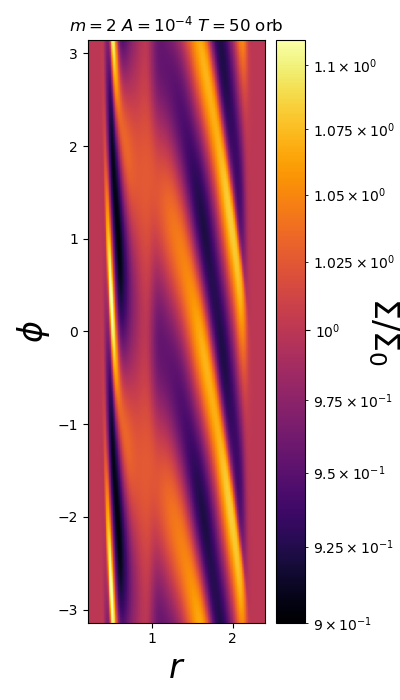

In [ ]:
importlib.reload(athplot)
ds = athplot.rawDataRestricted("/home/astrosun/jtlaune/athena/work/m-wave/testing/ppd_cyl.out1.00100.athdf")
fig, ax = plt.subplots(figsize=(4, 7))
for lev in range(1):
    cccs, lds = ds.get_level(lev) # meaning: cell center coordinates, level data set
    meshr, meshphi = np.meshgrid(cccs[0], cccs[1])
    im = ax.pcolormesh(meshr, meshphi, lds['dens'], shading='nearest', cmap="inferno", norm=colors.LogNorm(vmin=0.9, vmax=1.11))
cb = plt.colorbar(im)
cb.ax.set_ylabel(r"$\Sigma/\Sigma_0$",rotation=270,fontsize=24)
ax.set_title(r"$m=2$ $A=10^{-4}$ $T=50$ orb")
ax.set_ylabel(r"$\phi$",fontsize=24)
ax.set_xlabel(r"$r$",fontsize=24)
fig.tight_layout()

## Torque magnitudes over time

[0.0100005  0.0100005  0.0100005  ... 0.01002676 0.01002676 0.01002676]
10000


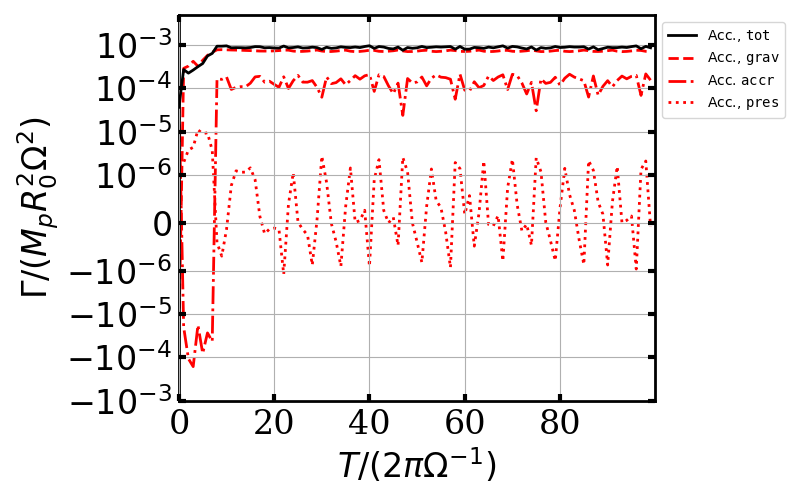

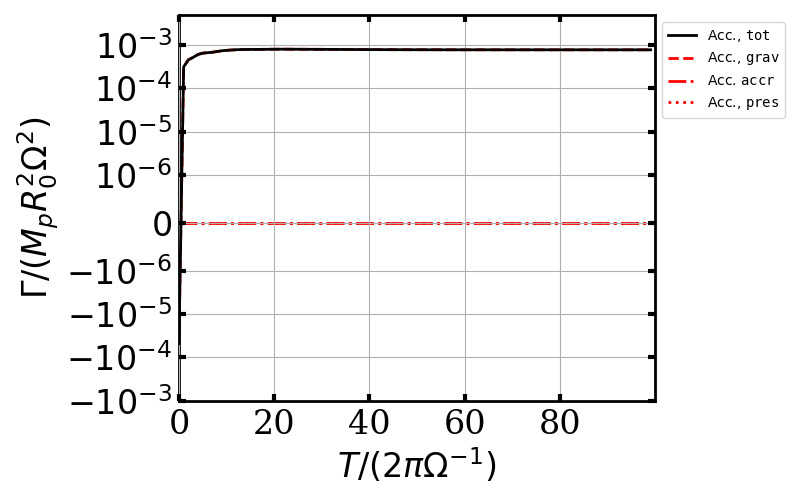

In [130]:
importlib.reload(athplot)
hstAcc = athplot.athhst(1e-3,"/home/astrosun/jtlaune/athena/work/type2-linext/accrete/ppd_cyl.hst")
print(np.diff(hst.t))
print(len(hst.t))
fig, ax = hstAcc.plotSmoothTorq("Acc.",24,symlog=True,linthresh=1e-6,c="r",ct="k",step=100,ybds=(-1e-3,5e-3))

hstNoAcc = athplot.athhst(1e-3,"/home/astrosun/jtlaune/athena/work/type2-linext/no_accrete/ppd_cyl.hst")
fig, ax = hstNoAcc.plotSmoothTorq("Acc.",24,symlog=True,linthresh=1e-6,c="r",ct="k",step=100,ybds=(-1e-3,5e-3))

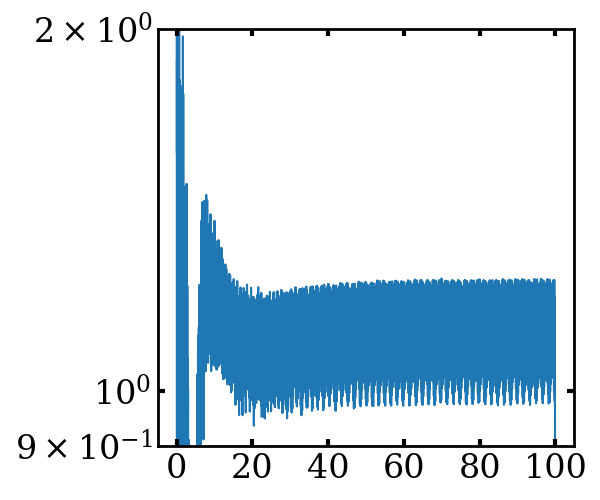

In [50]:
with mpl.rc_context(analytic): fig, ax = plt.subplots()
totAcc = hstAcc.FP_y + hstAcc.momy_accrate + hstAcc.Fsgrav_y
ax.plot(hstAcc.t, athplot.movingAverage(totAcc,24)/athplot.movingAverage(hstNoAcc.Fsgrav_y,24))
ax.set_yscale("log")
ax.set_ylim((0.9,2))
fig.tight_layout()

## Density profiles over time

yt : [WARNING  ] 2023-05-21 19:11:20,878 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2023-05-21 19:11:20,878 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2023-05-21 19:11:20,879 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2023-05-21 19:11:20,879 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2023-05-21 19:11:20,909 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-05-21 19:11:20,910 Parameters: domain_dimensions         = [ 64 384   1]
yt : [INFO     ] 2023-05-21 19:11:20,910 Parameters: domain_left_edge          = [ 0.40000001 -3.14159274 -0.5       ]
yt : [INFO     ] 2023-05-21 19:11:20,911 Parameters: domain_right_edge         = [1.60000002 3.14159274 0.5       ]
yt : [INFO     ] 2023-05-21 19:11:20,911 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2023-05-21 19:11:21,912 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2023-05-21 19:11:21,912 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2023-05-21 19:11:21,913 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2023-05-21 19:11:21,913 Assuming 1.0 = 1.0 K
yt :

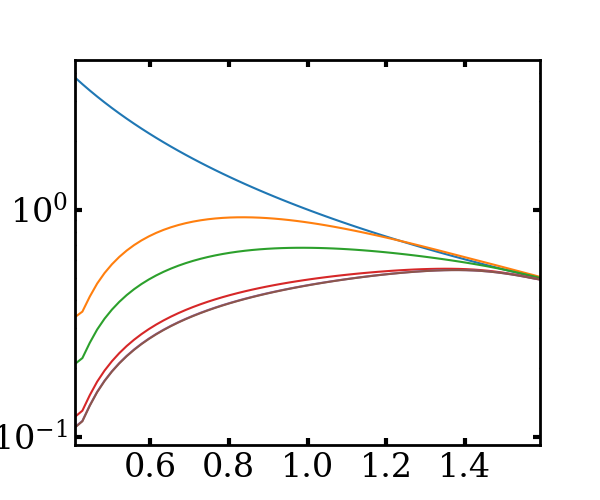

In [25]:
data_dir = "/home/astrosun/jtlaune/athena/work/smr4_noPlanet/"
with mpl.rc_context(analytic): fig, ax = plt.subplots()
for iout in [0,10,20,50,100,200]:
    data_file = os.path.join(data_dir,f"ppd_cyl.out1.{iout:05}.athdf")
    hdf5 = athplot.PpdCylAthhdf5(1e-3,(64,384),data_file)
    profs = hdf5.reduce(data_dir)
    ax.plot(profs["rMidpts"],profs["Sig"])
    ax.set_xlim((profs["rMidpts"][0],profs["rMidpts"][-1]))
ax.set_yscale("log")

yt : [WARNING  ] 2023-05-21 19:11:27,852 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2023-05-21 19:11:27,852 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2023-05-21 19:11:27,853 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2023-05-21 19:11:27,854 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2023-05-21 19:11:27,883 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-05-21 19:11:27,884 Parameters: domain_dimensions         = [ 64 384   1]
yt : [INFO     ] 2023-05-21 19:11:27,884 Parameters: domain_left_edge          = [ 0.40000001 -3.14159274 -0.5       ]
yt : [INFO     ] 2023-05-21 19:11:27,885 Parameters: domain_right_edge         = [1.60000002 3.14159274 0.5       ]
yt : [INFO     ] 2023-05-21 19:11:27,885 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2023-05-21 19:11:28,827 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2023-05-21 19:11:28,828 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2023-05-21 19:11:28,828 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2023-05-21 19:11:28,829 Assuming 1.0 = 1.0 K
yt :

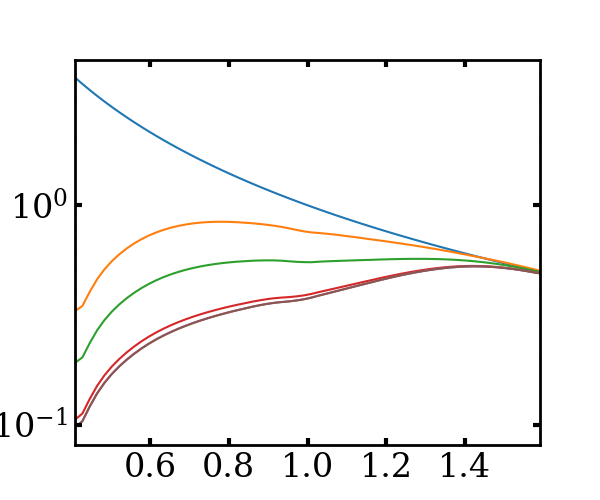

In [26]:
data_dir = "/home/astrosun/jtlaune/athena/work/smr4/"
with mpl.rc_context(analytic): fig, ax = plt.subplots()
for iout in [0,10,20,50,100,200]:
    data_file = os.path.join(data_dir,f"ppd_cyl.out1.{iout:05}.athdf")
    hdf5 = athplot.PpdCylAthhdf5(1e-3,(64,384),data_file)
    profs = hdf5.reduce(data_dir)
    ax.plot(profs["rMidpts"],profs["Sig"])
    ax.set_xlim((profs["rMidpts"][0],profs["rMidpts"][-1]))
ax.set_yscale("log")

yt : [WARNING  ] 2023-05-21 19:11:34,702 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2023-05-21 19:11:34,702 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2023-05-21 19:11:34,703 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2023-05-21 19:11:34,703 Assuming 1.0 = 1.0 K
yt : [INFO     ] 2023-05-21 19:11:34,733 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-05-21 19:11:34,733 Parameters: domain_dimensions         = [ 64 384   1]
yt : [INFO     ] 2023-05-21 19:11:34,734 Parameters: domain_left_edge          = [ 0.40000001 -3.14159274 -0.5       ]
yt : [INFO     ] 2023-05-21 19:11:34,734 Parameters: domain_right_edge         = [1.60000002 3.14159274 0.5       ]
yt : [INFO     ] 2023-05-21 19:11:34,735 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2023-05-21 19:11:35,617 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2023-05-21 19:11:35,618 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2023-05-21 19:11:35,619 Assuming 1.0 = 1.0 g
yt : [WARNING  ] 2023-05-21 19:11:35,619 Assuming 1.0 = 1.0 K
yt :

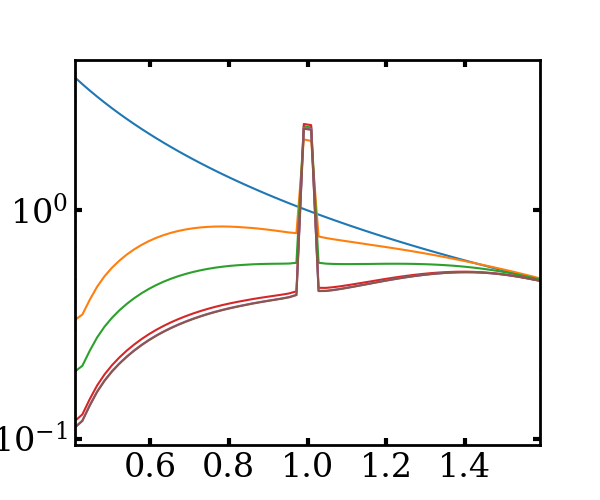

In [27]:
data_dir = "/home/astrosun/jtlaune/athena/work/smr4_noAcc/"
with mpl.rc_context(analytic): fig, ax = plt.subplots()
for iout in [0,10,20,50,100,200]:
    data_file = os.path.join(data_dir,f"ppd_cyl.out1.{iout:05}.athdf")
    hdf5 = athplot.PpdCylAthhdf5(1e-3,(64,384),data_file)
    profs = hdf5.reduce(data_dir)
    ax.plot(profs["rMidpts"],profs["Sig"])
    ax.set_xlim((profs["rMidpts"][0],profs["rMidpts"][-1]))
ax.set_yscale("log")

## $\dot M$ profiles

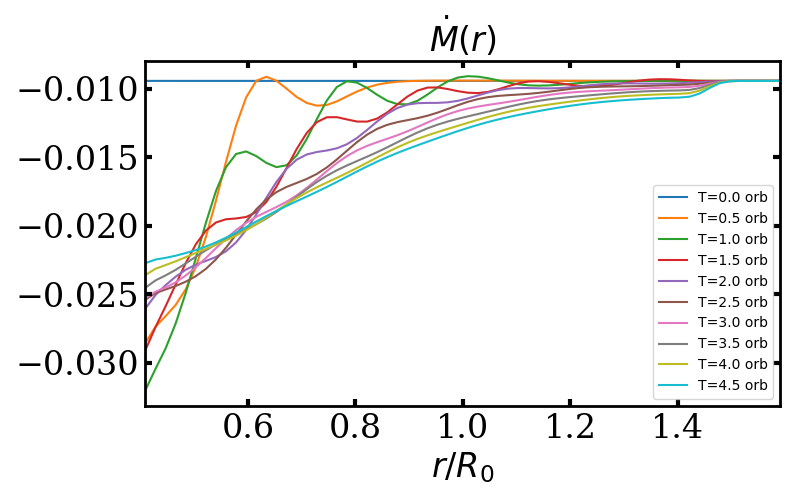

In [51]:
importlib.reload(athplot)
data_dir = "/home/astrosun/jtlaune/athena/work/type2-linext/no_planet/"
with mpl.rc_context(analytic): fig, ax = plt.subplots(figsize=(8,5))
for iout in range(0,10):
    data_file = os.path.join(data_dir,f"ppd_cyl.out1.{iout:05}.athdf")
    hdf5 = athplot.PpdCylAthhdf5(1e-3,(64,384),data_file,data_dir,force=False)
    profs = hdf5.load()
    ax.plot(profs["rMidpts"],profs["Mdot"],label=f"T={iout*0.5} orb")
    ax.set_xlim((profs["rMidpts"][0],profs["rMidpts"][-1]))
#ax.set_yscale("log")
ax.legend()
ax.set_title(r"$\dot M(r)$",fontsize=24)
ax.set_xlabel(r"$r/R_0$")
fig.tight_layout()

In [13]:
0.001/3/np.pi

0.0001061032953945969

## Testing amr profiles

In [27]:
def interp(iout):
    data_dir = "/home/astrosun/jtlaune/athena/work/type2-powlaw/accrete/"
    ds = yt.load(os.path.join(data_dir, f"ppd_cyl.out1.{iout:05}.athdf"))
    dd = ds.all_data()
    r = np.linspace(0.4, 1.6, 1024 + 1)
    p = np.linspace(-np.pi, np.pi, 6144 + 1)
    r = (r[:-1] + r[1:]) / 2
    RR, PP = np.meshgrid(r, p)
    densInterp = sp.interpolate.griddata(
        (np.array(dd.fcoords[:, 0]), np.array(dd.fcoords[:, 1])),
        np.array(dd["athena_pp", "dens"]),
        (RR.flatten(), PP.flatten()),
        method="nearest",
    )
    vrInterp = sp.interpolate.griddata(
        (np.array(dd.fcoords[:, 0]), np.array(dd.fcoords[:, 1])),
        np.array(dd["athena_pp", "mom1"]) / np.array(dd["athena_pp", "dens"]),
        (RR.flatten(), PP.flatten()),
        method="nearest",
    )
    return (RR, PP, densInterp.reshape(RR.shape), vrInterp.reshape(RR.shape))

In [28]:
RR1, PP1, densInterp1, vrInterp1 = interp(0)
RR2, PP2, densInterp2, vrInterp2 = interp(200)

In [41]:
print(RR1[0,:].shape)

(1024,)


In [4]:
print(vrInterp2)

[[-0.00366348 -0.00366348 -0.00366348 ... -0.00094301 -0.00094301
  -0.00094301]
 [-0.00366348 -0.00366348 -0.00366348 ... -0.00094301 -0.00094301
  -0.00094301]
 [-0.00366348 -0.00366348 -0.00366348 ... -0.00094301 -0.00094301
  -0.00094301]
 ...
 [-0.00366348 -0.00366348 -0.00366348 ... -0.00094301 -0.00094301
  -0.00094301]
 [-0.00366348 -0.00366348 -0.00366348 ... -0.00094301 -0.00094301
  -0.00094301]
 [-0.00366348 -0.00366348 -0.00366348 ... -0.00094301 -0.00094301
  -0.00094301]]


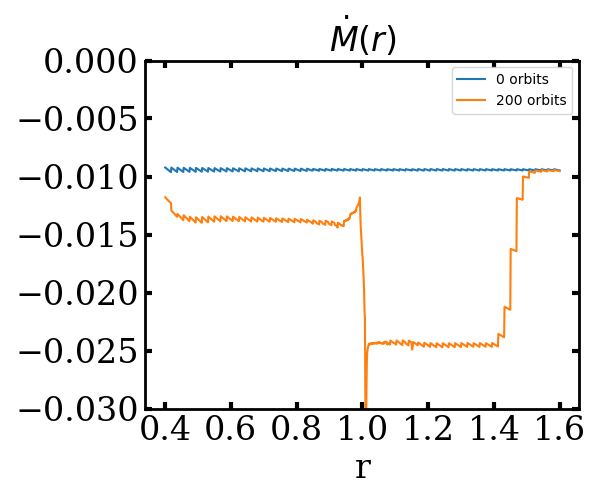

In [29]:
with mpl.rc_context(analytic): fig,ax = plt.subplots()
ax.plot(RR1[0,:],2*np.pi*np.mean(RR1*vrInterp1*densInterp1,axis=0),label=r"0 orbits")
ax.plot(RR2[0,:],2*np.pi*np.mean(RR2*vrInterp2*densInterp2,axis=0),label=r"200 orbits")
ax.set_xlabel("r",fontsize=24)
ax.set_title(r"$\dot M(r)$",fontsize=24)
ax.legend()
ax.set_ylim((-0.03,0))
fig.tight_layout()

In [44]:
fig.tight_layout()

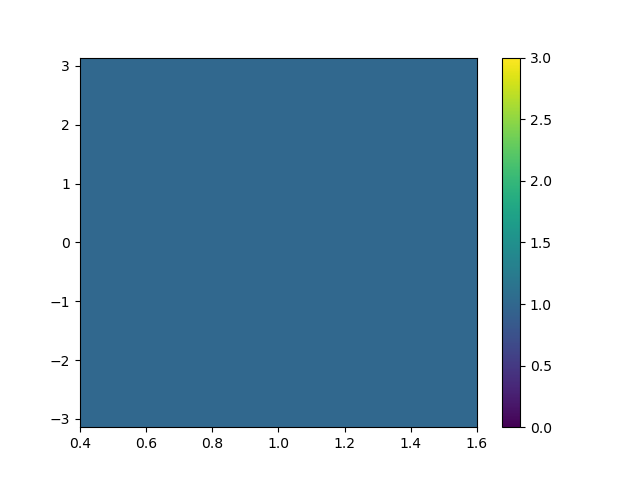

In [10]:
fig, ax = plt.subplots()
cs = ax.pcolormesh(RR2,PP2,densInterp2,vmin=0,vmax=3)
plt.colorbar(cs)

In [33]:
densInterp = densInterp.reshape(RR.shape)
vrInterp = vrInterp.reshape(RR.shape)

In [34]:
#fig,ax = plt.subplots()
ax.plot(r,2*np.pi*np.mean(RR*vrInterp*densInterp,axis=1))

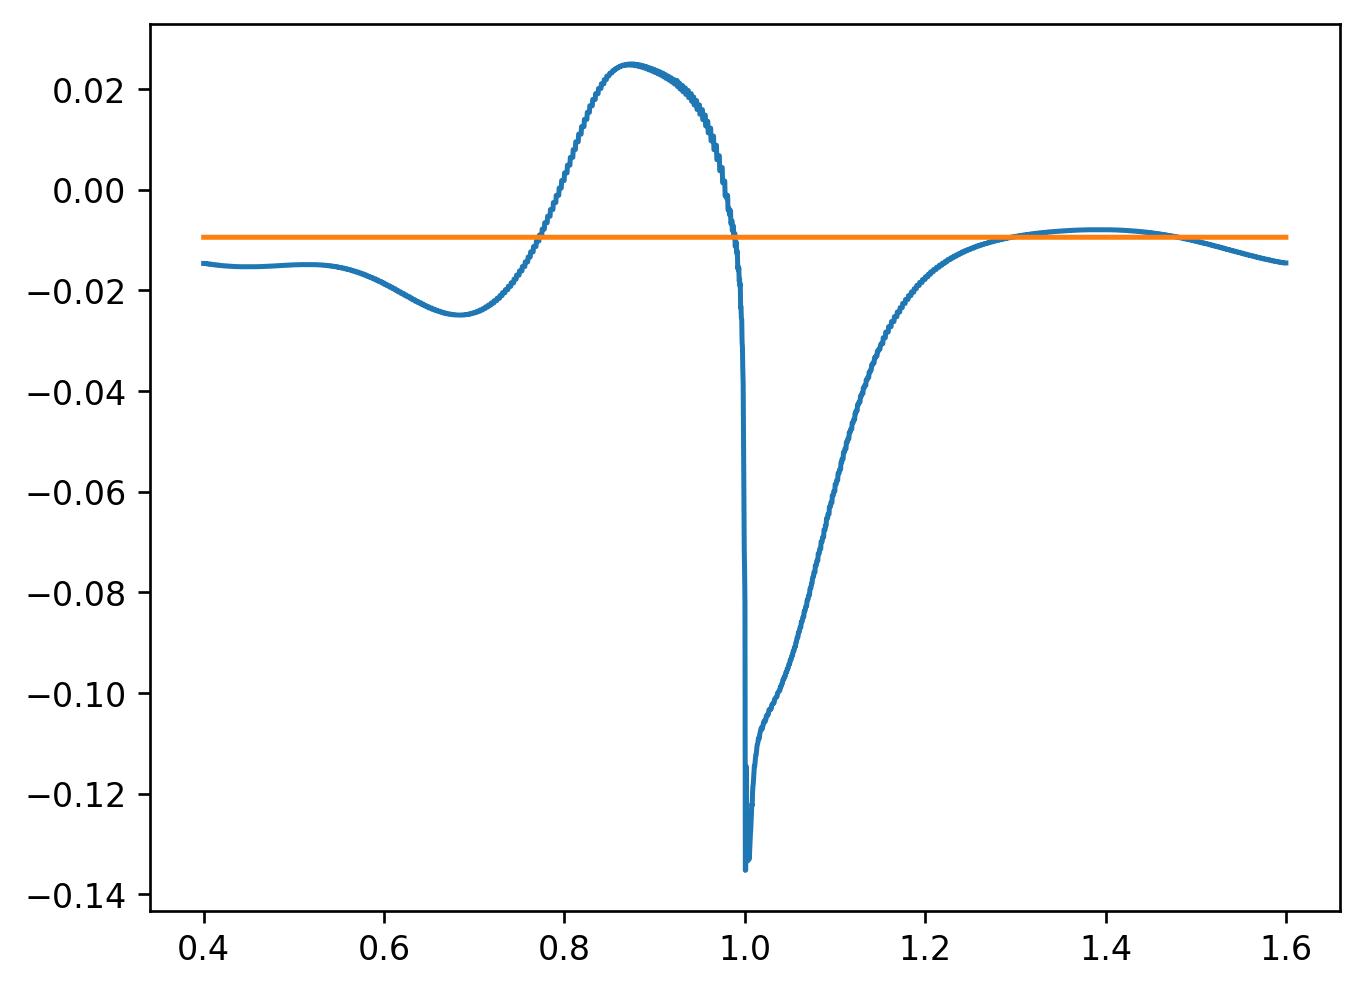

In [35]:
fig

In [ ]:

        dens_data = np.array(dd["athena_pp", "dens"])
        vr_data = np.array(dd["athena_pp", "mom1"]) / dens_data
        vphi_data = np.array(dd["athena_pp", "mom2"]) / dens_data
        # coords are cell-centered
        coords = np.array(dd.fcoords)
        # widths of cells
        fwidths = np.array(dd.fwidth)

# Type I

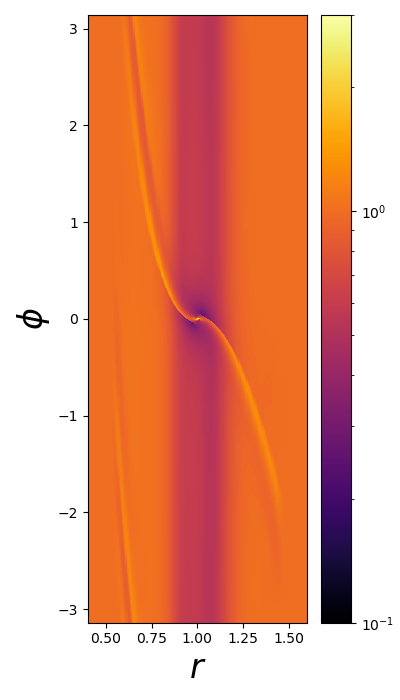

In [133]:
importlib.reload(athplot)
ds = athplot.rawDataRestricted("/home/astrosun/jtlaune/Type1BCs/type1_accrete/ppd_cyl.out1.00100.athdf")
fig, ax = plt.subplots(figsize=(4, 7))
for lev in range(7):
    cccs, lds = ds.get_level(lev) # meaning: cell center coordinates, level data set
    meshr, meshphi = np.meshgrid(cccs[0], cccs[1])
    im = ax.pcolormesh(meshr, meshphi, lds['dens'], shading='nearest', cmap="inferno", norm=colors.LogNorm(vmin=0.1, vmax=3))
cb = plt.colorbar(im)
ax.set_ylabel(r"$\phi$",fontsize=24)
ax.set_xlabel(r"$r$",fontsize=24)
fig.tight_layout()


1. use q=5e-5
2. use duffel gap profile initial, extend radial domain
3. increase nu to 1e-5
4. change shape of meshblock to be more square, 2^n
5. resolve 2% hill with ~6 cells (only 5 levels of refinement)

**6. non-accreting first without gap profile**  
**Send Rixin better torque plots of the already-ran Type1**

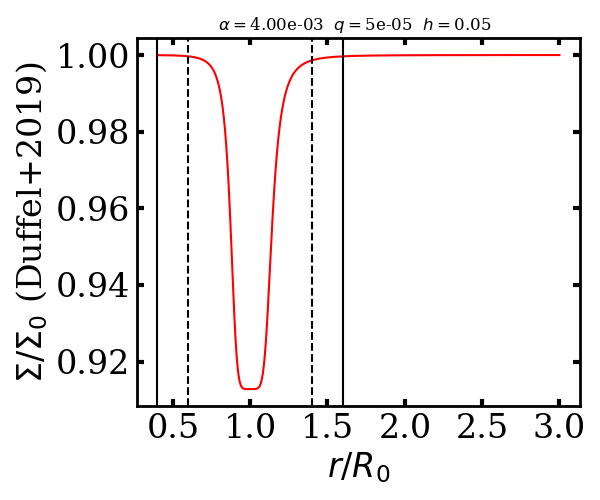

In [39]:
# duffel gap profile
h_r = 0.05
nu =1e-5
q = 5e-5

a = 1
vk = 1

M = 1/h_r
alpha = nu/(h_r*vk)**2
D = 7*M**1.5/alpha**0.25

def qtil(x):
    return q/(1+D**3*((x/a)**(1./6)-1)**6)**(1./3)

def de(q):
    qc = np.zeros(len(q))
    q_NL = 1.04*M**(-3)
    q_w = q_NL*(alpha*M)**(1./5)
    for i in range(len(qc)):
        if q[i] < q_NL:
            qc[i] = 1
        else:
            qc[i] = (q/q_NL)**(-1./2)+(q/q_w)**3
    return(qc)

def Sig_Sig0(x):
    return 1/(1+(0.45*qtil(x)**2*M**5*de(qtil(x)))/(3*np.pi*alpha))

r = np.linspace(0.4, 3.0, 1000)
with mpl.rc_context(analytic):
    fig, ax = plt.subplots()
ax.plot(r, Sig_Sig0(r), c="r")
ax.set_ylabel(r"$\Sigma/\Sigma_0$ (Duffel+2019)")
ax.set_xlabel(r"$r/R_0$")
ax.axvline(x=0.4, ls="-", c="k")
ax.axvline(x=0.6, ls="--", c="k")
ax.axvline(x=1.6, ls="-", c="k")
ax.axvline(x=1.4, ls="--", c="k")
ax.set_title(
    r"$\alpha=$" + f"{alpha:0.2e}  " + r"$q=$" + f"{q}  " + r"$h=$" + f"{h_r}  "
)
fig.tight_layout()

In [156]:
K = 5e-5**2/0.004/0.05**5
1/(1+0.04*K)

0.9259259259259258

In [155]:
2**(-1./3)*14/2 # drop level of evolution
# 400 orbits

5.555903681888698

In [157]:
1e-5/(0.05**2)

0.003999999999999999

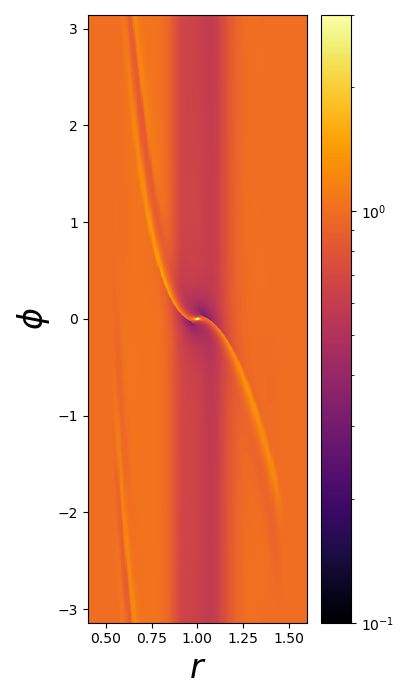

In [129]:
importlib.reload(athplot)
ds = athplot.rawDataRestricted("/home/astrosun/jtlaune/Type1BCs/type1_fiducial/ppd_cyl.out1.00100.athdf")
fig, ax = plt.subplots(figsize=(4, 7))
for lev in range(6):
    cccs, lds = ds.get_level(lev) # meaning: cell center coordinates, level data set
    meshr, meshphi = np.meshgrid(cccs[0], cccs[1])
    im = ax.pcolormesh(meshr, meshphi, lds['dens'], shading='nearest', cmap="inferno", norm=colors.LogNorm(vmin=0.1, vmax=3))
cb = plt.colorbar(im)
ax.set_ylabel(r"$\phi$",fontsize=24)
ax.set_xlabel(r"$r$",fontsize=24)
fig.tight_layout()



## Density profiles

### Accreting

In [71]:
data_dir = "/home/astrosun/jtlaune/Type1BCs/type1_accrete"
outdir = "/home/astrosun/jtlaune/Type1Outs/accrete"
for iout in [0,10,20,50,90,100]:
    data_file = os.path.join(data_dir,f"ppd_cyl.out1.{iout:05}.athdf")
    hdf5 = athplot.PpdCylAthhdf5(1e-3,(192,1152),data_file,outdir)
    profs = hdf5.load()

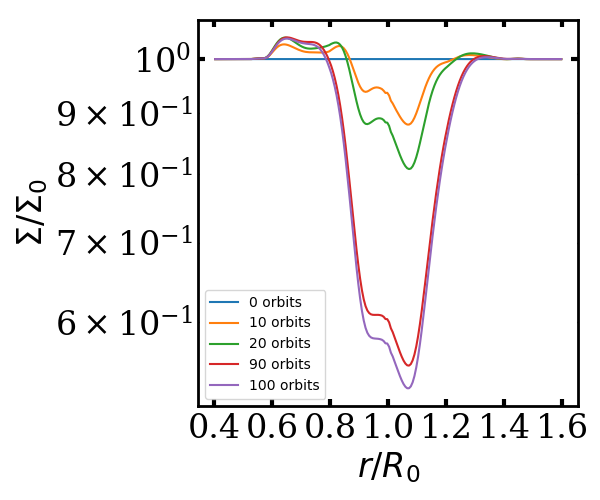

In [69]:
data_dir = "/home/astrosun/jtlaune/Type1BCs/type1_accrete"
outdir = "/home/astrosun/jtlaune/Type1Outs/accrete"
with mpl.rc_context(analytic): fig, ax = plt.subplots()
for iout in [0,10,20,90,100]:
    data_file = os.path.join(data_dir,f"ppd_cyl.out1.{iout:05}.athdf")
    hdf5 = athplot.PpdCylAthhdf5(1e-3,(192,1152),data_file,outdir)
    profs = hdf5.load()
    ax.plot(profs["rMidpts"],profs["Sig"],label=f"{iout} orbits")
ax.set_yscale("log")
ax.legend()
ax.set_xlabel(r"$r/R_0$")
ax.set_ylabel(r"$\Sigma/\Sigma_0$")
fig.tight_layout()

### Fiducial

In [127]:
data_dir = "/home/astrosun/jtlaune/Type1BCs/type1_fiducial"
outdir = "/home/astrosun/jtlaune/Type1Outs/no_accrete"
for iout in [0,10,20,50,90,100]:
    data_file = os.path.join(data_dir,f"ppd_cyl.out1.{iout:05}.athdf")
    hdf5 = athplot.PpdCylAthhdf5(1e-3,(192,1152),data_file,outdir)
    profs = hdf5.load()

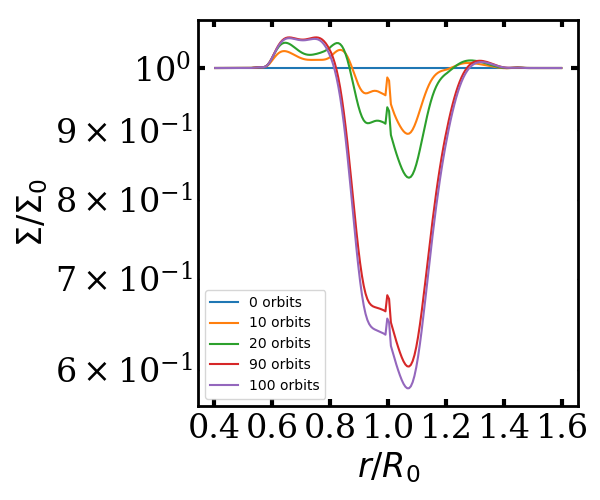

In [128]:
with mpl.rc_context(analytic): fig, ax = plt.subplots()
for iout in [0,10,20,90,100]:
    data_file = os.path.join(data_dir,f"ppd_cyl.out1.{iout:05}.athdf")
    hdf5 = athplot.PpdCylAthhdf5(1e-3,(192,1152),data_file,outdir)
    profs = hdf5.load()
    ax.plot(profs["rMidpts"],profs["Sig"],label=f"{iout} orbits")
ax.set_yscale("log")
ax.legend()
ax.set_xlabel(r"$r/R_0$")
ax.set_ylabel(r"$\Sigma/\Sigma_0$")
fig.tight_layout()

## Reducing the history file

In [132]:
data = np.loadtxt("/home/astrosun/jtlaune/Type1BCs/type1_fiducial/ppd_cyl.hst")
data.shape
data_reduced = {}
for i in range(16):
    data_reduced[i] = athplot.movingAverage(data[:,i],100)[::1000]

np.save("/home/astrosun/jtlaune/Type1Outs/no_accrete/reducedHst.npy",data_reduced)

In [109]:
hstNoAcc = np.load("/home/astrosun/jtlaune/Type1Outs/no_accrete/reducedHst.npz.npy",allow_pickle=True).item()
hstAcc = np.load("/home/astrosun/jtlaune/Type1Outs/accrete/reducedHst.npz.npy",allow_pickle=True).item()

In [158]:
11*1024/1000

11.264

## Torque

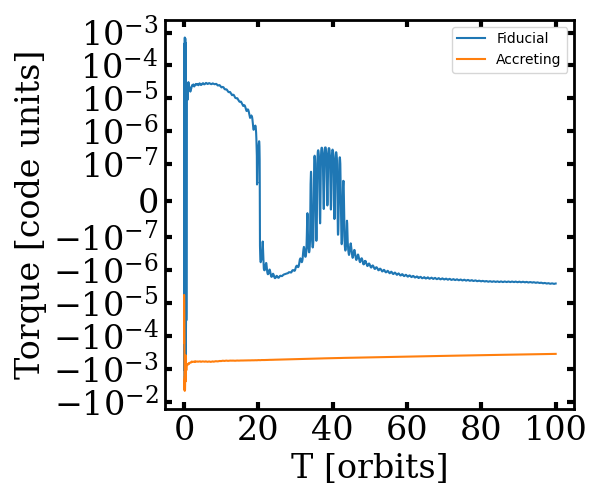

/home/astrosun/jtlaune/opt/miniconda3/envs/py311/lib/python3.11/site-packages/ipympl/backend_nbagg.py:279: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  self.manager.handle_json(content)
/home/astrosun/jtlaune/opt/miniconda3/envs/py311/lib/python3.11/site-packages/ipympl/backend_nbagg.py:279: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  self.manager.handle_json(content)
/home/astrosun/jtlaune/opt/miniconda3/envs/py311/lib/python3.11/site-packages/ipympl/backend_nbagg.py:279: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  self.manager.handle_json(content)
/home/astrosun/jtlaune/opt/miniconda3/envs/py311/lib/python3.11/site-packages/ipympl/backend_nbagg.py:279: UserWarning: All values for SymLogScale are 

In [126]:
with mpl.rc_context(analytic): fig, ax = plt.subplots()
ax.plot(hstNoAcc[0]/(2*np.pi),hstNoAcc[12],label="Fiducial")
ax.plot(hstAcc[0]/(2*np.pi),hstAcc[12]+hstAcc[10]+hstAcc[15],label="Accreting")
ax.set_yscale("symlog",linthresh=1e-7)
ax.legend()
ax.set_ylabel("Torque [code units]")
ax.set_xlabel("T [orbits]")
fig.tight_layout()

## Disk Mass

In [ ]:
with mpl.rc_context(analytic): fig, ax = plt.subplots()
ax.plot(hstNoAcc[0]/(2*np.pi),hstNoAcc[12],label="Fiducial")
ax.plot(hstAcc[0]/(2*np.pi),hstAcc[12]+hstAcc[10]+hstAcc[15],label="Accreting")
ax.set_yscale("symlog",linthresh=1e-7)
ax.legend()
ax.set_ylabel("Torque [code units]")
ax.set_xlabel("T [orbits]")
fig.tight_layout()
